In [27]:
from alpha_vantage.timeseries import TimeSeries
api_key = 'RDW63LUED9U3S55M'
symbol = 'RELIANCE.BSE'

def get_stock_data(symbol, api_key):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data
def prepare_data(data):
    data = data[['1. open', '2. high', '3. low', '4. close', '5. volume']]
    data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    return data

data = get_stock_data(symbol,api_key)
df = prepare_data(data)



In [28]:
df =df.reset_index()
df


,date,Open,High,Low,Close,Volume
0,2024-02-08,2895.6001,2919.7500,2856.7000,2902.9500,98849.0
1,2024-02-07,2870.0000,2898.0000,2858.4500,2883.3999,320512.0
2,2024-02-06,2887.3999,2887.3999,2840.8000,2856.8000,115081.0
3,2024-02-05,2921.2000,2940.0000,2864.0000,2877.0500,128072.0
4,2024-02-02,2864.4500,2949.8999,2864.4500,2914.7500,653622.0
...,...,...,...,...,...,...
4703,2005-01-07,359.8269,373.1159,359.5202,368.5840,16969845.0
4704,2005-01-06,357.7824,365.6195,356.1468,358.4297,13446517.0
4705,2005-01-05,358.1230,363.9158,351.8194,361.1217,16954266.0
4706,2005-01-04,364.5972,371.3782,360.8491,361.7351,10059943.0


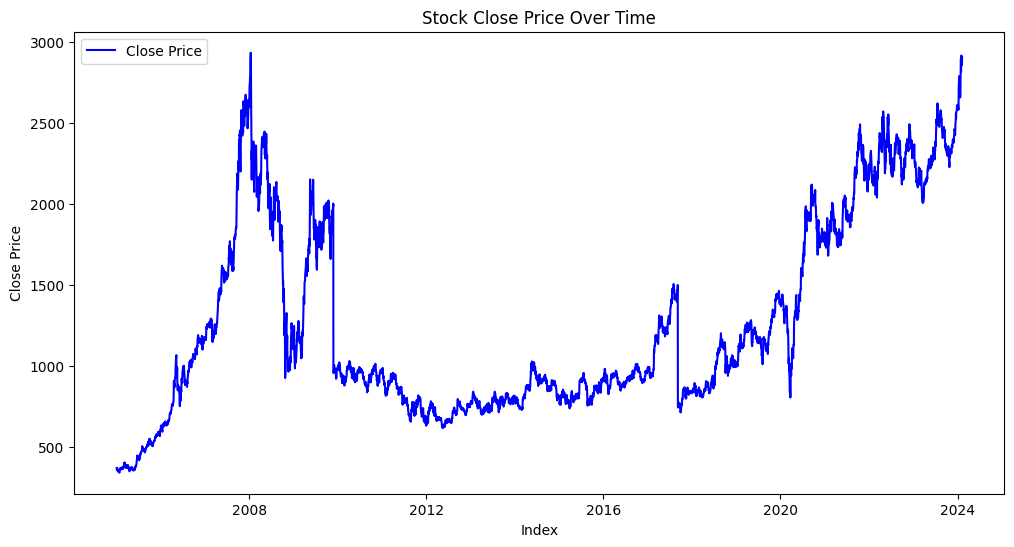

In [29]:
import matplotlib.pyplot as plt

# Plotting the closing prices using numerical index
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [30]:
df.describe()

,date,Open,High,Low,Close,Volume
count,4708,4708.000000,4708.000000,4708.000000,4708.000000,4.708000e+03
mean,2014-07-22 00:43:25.947323648,1268.814708,1285.184391,1252.046889,1268.113529,2.981169e+06
min,2005-01-03 00:00:00,344.152500,347.798500,339.518500,341.699200,0.000000e+00
25%,2009-10-13 12:00:00,823.192300,830.120675,812.287125,822.064225,4.218022e+05
50%,2014-07-16 12:00:00,989.084250,1002.804200,975.364400,988.058750,8.698080e+05
75%,2019-05-07 06:00:00,1805.006700,1826.190775,1775.185550,1800.859125,2.540924e+06
max,2024-02-08 00:00:00,2931.768100,2964.677700,2864.450000,2932.041700,8.021841e+08
std,NaN,606.678792,614.877593,598.711635,606.803088,2.070018e+07


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4708 non-null   datetime64[ns]
 1   Open    4708 non-null   float64       
 2   High    4708 non-null   float64       
 3   Low     4708 non-null   float64       
 4   Close   4708 non-null   float64       
 5   Volume  4708 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 220.8 KB


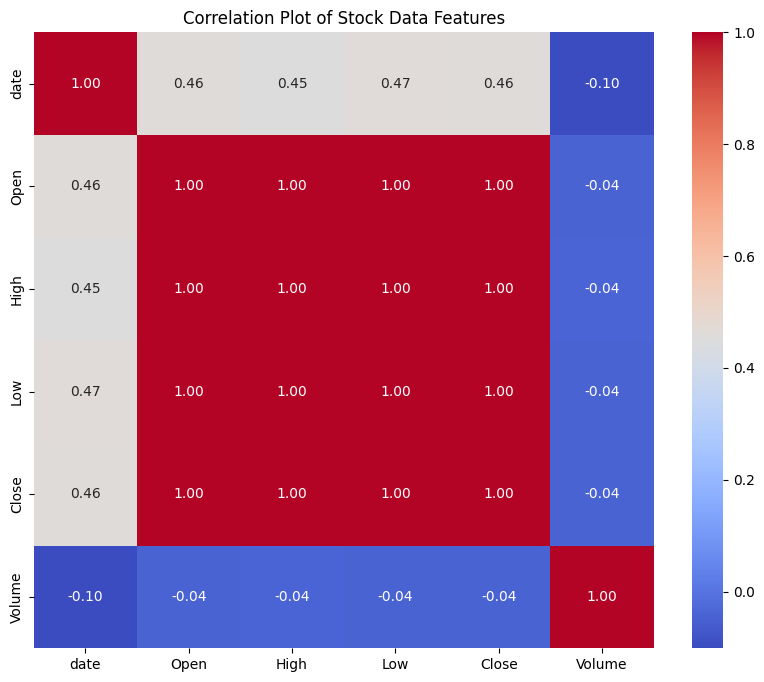

In [32]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Stock Data Features')
plt.show()


In [33]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Close'])  # Assuming 'Close' is your target variable
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3766, 5)
X_test shape: (942, 5)
y_train shape: (3766,)
y_test shape: (942,)


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data (excluding datetime column) and transform it
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['date']))

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test.drop(columns=['date']))

# Display the scaled data
print("Scaled X_train:")
print(X_train_scaled)
print("\nScaled X_test:")
print(X_test_scaled)


Scaled X_train:
[[3.59929997e-01 3.56464587e-01 3.64211980e-01 2.20879819e-03]
 [2.12117355e-01 2.11003576e-01 2.13583101e-01 3.79098884e-04]
 [4.11223076e-01 4.09313373e-01 4.14704439e-01 5.19660095e-04]
 ...
 [1.75239339e-01 1.72781507e-01 1.77857459e-01 1.11048343e-03]
 [4.24523917e-01 4.19035284e-01 3.99883442e-01 1.06502887e-02]
 [6.24160556e-01 6.20971343e-01 6.31441289e-01 8.93004384e-04]]

Scaled X_test:
[[3.44011393e-01 3.43309373e-01 3.47170527e-01 1.62934566e-03]
 [2.32952943e-01 2.32058981e-01 2.38314822e-01 1.21022891e-03]
 [6.62382552e-01 6.91249273e-01 6.65307277e-01 4.50962003e-03]
 ...
 [1.86612276e-01 1.85166035e-01 1.89573460e-01 3.25099692e-04]
 [1.71808009e-01 1.72711448e-01 1.76882620e-01 5.13297129e-04]
 [8.21501156e-01 8.17762713e-01 8.33678656e-01 1.32726809e-03]]


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined
# Define the model architecture
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)


Epoch 1/100
118/118 [==============================] - 4s 12ms/step - loss: 1921457.3750 - val_loss: 2060082.2500
Epoch 2/100
118/118 [==============================] - 1s 4ms/step - loss: 1892884.8750 - val_loss: 2042044.2500
Epoch 3/100
118/118 [==============================] - 1s 4ms/step - loss: 1876403.0000 - val_loss: 2025459.5000
Epoch 4/100
118/118 [==============================] - 1s 6ms/step - loss: 1860753.0000 - val_loss: 2009479.1250
Epoch 5/100
118/118 [==============================] - 1s 4ms/step - loss: 1845688.6250 - val_loss: 1993863.3750
Epoch 6/100
118/118 [==============================] - 1s 4ms/step - loss: 1830468.5000 - val_loss: 1978441.3750
Epoch 7/100
118/118 [==============================] - 1s 5ms/step - loss: 1815895.0000 - val_loss: 1963293.7500
Epoch 8/100
118/118 [==============================] - 1s 5ms/step - loss: 1801481.1250 - val_loss: 1948315.1250
Epoch 9/100
118/118 [==============================] - 1s 4ms/step - loss: 1787093.8750 - val_l

In [36]:
import numpy as np

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss (MSE):", loss)

# Compute RMSE and MAE
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mae = np.mean(np.abs(y_pred - y_test))
print("RMSE:", rmse)
print("MAE:", mae)


30/30 [==============================] - 0s 2ms/step - loss: 920280.8125
Test Loss (MSE): 920280.8125


30/30 [==============================] - 1s 1ms/step


ValueError: Data must be 1-dimensional, got ndarray of shape (942, 942) instead